## Capstone 1 : Design an Experiment
### Jackie Zuker

The dataset that we will use for this exercise is taken from data.gov, and is a repository of health attributes for 500 cities in the United States. 

The open-source dataset can be accessed here: https://catalog.data.gov/dataset/500-cities-local-data-for-better-health-b32fd





## Introduction: 

In the United States, healthcare costs are soaring. Groups across the nation are investigating ways to limit healthcare costs. The relationship between tobacco use and lung cancer rates are well studied, however, the effectiveness of programs designed to limit consumption of tobacco is not well known. Taxes on tobacco use may have a higher or lower effect on curbing consumption than predicted. Additionally, these programs could have negative effects that are unanticipated. In the historical cases of alcohol prohibition and marijuana prohibition, a black market for consumption may arise.   

The United States government wants to quantify how much of an effect a tobacco tax has on smoking rates, as well as externalities including the effect on rates of cancer, physical health, mental health, rates of obesity, and rates of binge drinking within the state. Any kind of Federal push to curb tobacco use will incur large costs and much political pushback to implement this on a large scale, so government officials want to make sure that the tax will have the desired effect before unrolling the full tax in the entire country. The population will need to be large enough so that a substantial sample group is included and so the study has enough power to ensure accuracy. 

Additionally, obtaining quality data before and after implementation of the tax will be necessary to elucidate any short-term effects, long-term effects, and to separate these effects from broader trends in tobacco usage in the population.


## Methodology

Let 40 cities be chosen randomly from the following constraints. The cities will be chosen from the set of 500 cities provided in the dataset, and divided into two groups. 
    The constraints put on which cities are chosen should be:
       
    * Each group must have 10 small, 5 medium, and 5 large cities
    * For cities of similar size, both the treatment group and the control group should have similar compositions of starting rates of current adult smokers. 
    * None of the cities may occur within 100 miles of each other. The goal is to have each city as independent of each other as possible. 

#### Explanation of constraints and reasoning behind methodology
It is important to make the treatment group (which will receive the tax) and the control group (which will not receive the tax) as similar as possible. Additionally, in order to get the most accurate possible results, we want the samples to be representative of the cities across the United States, and not just focus on cities of one specific size. To the extent possible, the treatment and control groups should have similar compositions of starting rates of smokers. Cities which already have very low rates of smokers may be more inclined to continue other actions designed to limit smoking, and may be more receptive to the tax overall. Contrariwise, cities with high rates of smoking may be less receptive and the tax may not have the same effect as it would for other cities. 

For each city in the treatment group, there may be extraneous effects on nearby towns/cities if the residents choose to purchase their tobacco outside of the city lines. Thus, by making each city be at least 100 miles from each other, the effects of potential spikes in purchasing in nearby towns will be independant of other cities included in the study.

#### Experiment roll-out and timeline

Take a combination of current and historical data for 5 years to establish a baseline for current trends and natural fluctuations that may be present within the dataset. The first years will establish a baseline for A/A testing between the two groups. At the end of the five-year period, introduce a the tobacco tax in each of the cities in the treatment group for an initial period of 15 years. Because smoking has been shown to cause epigenetic effects on smoker's offspring, if would be interesting to consider extending the Study for as long as possible. 

Each of the unique measures provided in the 500 Cities dataset should be monitored using a consistent methodology in each city. This includes: 

    * Current smoking among adults aged >=18 Years
    * Current lack of health insurance among adults aged 18–64 Years 
    * Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure
    * Cancer (excluding skin cancer) among adults aged >=18 Years
    * Current asthma among adults aged >=18 Years
    * Coronary heart disease among adults aged >=18 Years
    * Visits to doctor for routine checkup within the past Year among adults aged >=18 Years
    * Cholesterol screening among adults aged >=18 Years", "Fecal occult blood test, sigmoidoscopy, or colonoscopy
    among adults aged 50–75 Years
    * Chronic obstructive pulmonary disease among adults aged >=18 Years
    * Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot 
    past Year, PPV shot ever, Colorectal cancer screening
    * Older adult women aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot
    past Year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 Years
    * Visits to dentist or dental clinic among adults aged >=18 Years
    * Diagnosed diabetes among adults aged >=18 Years
    * High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years
    * Chronic kidney disease among adults aged >=18 Years
    * No leisure-time physical activity among adults aged >=18 Years
    * Mammography use among women aged 50–74 Years
    * Mental health not good for >=14 days among adults aged >=18 Years
    * Obesity among adults aged >=18 Years
    * Papanicolaou smear use among adult women aged 21–65 Years
    * Physical health not good for >=14 days among adults aged >=18 Years 
    * Sleeping less than 7 hours among adults aged >=18 Years
    * Stroke among adults aged >=18 Years
    * All teeth lost among adults aged >=65 Years


Potential biases present in the dataset are that this dataset is centered around City behaviors. There may be difference between City populations and Rural populations that will not be captured by this experiment. Thus, if historical or current rural data is available, those populations should be included as well. 


## Exploratory Analysis

Let's see if there are any interesting associations between these variables in our dataset. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats


In [2]:
PATH = "/Users/jacquelynzuker/Desktop/DataScienceBootcamp/Unit1Capstone/500_Cities__Local_Data_for_Better_Health.csv"
dat = pd.read_csv(PATH)

# Remove redundant data in the set
dat = dat[dat.StateAbbr != "US"]
# Remove Precint Data, focusing on City-level and age-adjusted prevalence for this experiment
dat = dat[dat.GeographicLevel == "City"][dat.Data_Value_Type == "Age-adjusted prevalence"]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



## Positive association between higher smoking rates and higher rates of blood pressure 


From an initial look, there does seem to be a positive association between cities with high smoking rates and rates of high blood pressure. 





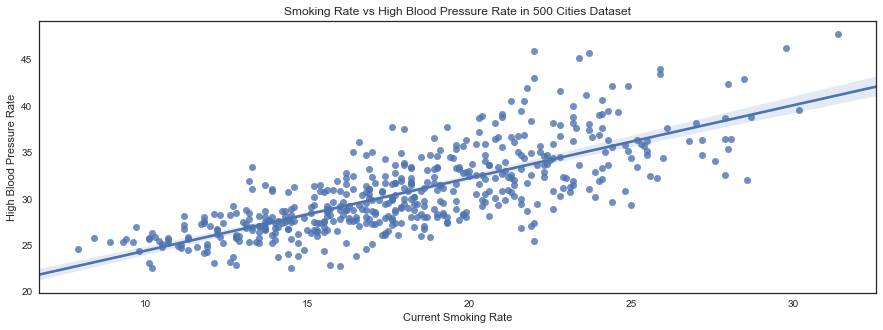

In [3]:
sns.set_style("white")
plt.figure(figsize = (15,5))
sns.regplot(x = dat[dat.Measure == "Current smoking among adults aged >=18 Years"]["Data_Value"], 
            y = dat[dat.Measure == "High blood pressure among adults aged >=18 Years"]["Data_Value"])
plt.xlabel("Current Smoking Rate")
plt.ylabel("High Blood Pressure Rate")
plt.title("Smoking Rate vs High Blood Pressure Rate in 500 Cities Dataset")
plt.show()


## Positive association between higher smoking rates and poor physical health 

Similarly, as shown below, there is a positive correlation between cities with high smoking rates and rates of poor physical health. 



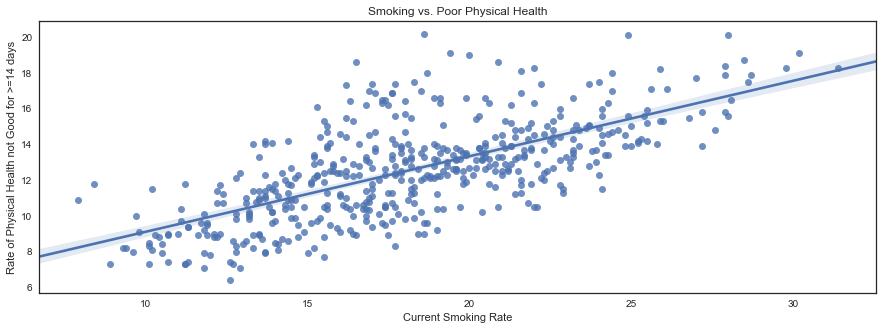

In [4]:
plt.figure(figsize = (15,5))
sns.regplot(x = dat[dat.Measure == "Current smoking among adults aged >=18 Years"]["Data_Value"], 
            y = dat[dat.Measure == "Physical health not good for >=14 days among adults aged >=18 Years"]
            ["Data_Value"])
plt.xlabel("Current Smoking Rate")
plt.ylabel("Rate of Physical Health not Good for >=14 days")
plt.title("Smoking vs. Poor Physical Health")
plt.show()

## Reformatting the measure table


In [6]:
#Format the list of measure for easy input to the correlation plot
measures_list = list()
for i in range(len(measures)):
    measures_list.append(measures[i])
measures_string = '", "'.join(measures_list)
measures_string = "\"{}\"".format(measures_string)


In [7]:
# Gather list of all Measures
measures = list(dat.Measure.unique())
# Create new DataFrame to hold values for each measure
exp_df = pd.DataFrame({"City" : dat["CityName"] })

label_list = list()
for measure in measures_list: 
    label_list.append(measure[0:20] + "...")
label_list 

for i in range(len(measures)):
    exp_df[label_list[i]] = dat[dat.Measure == measures[i]]["Data_Value"]
grouped = exp_df.groupby(["City"])
healthdata = grouped.max()
healthdata.head(10)

,Current lack of heal...,Arthritis among adul...,Binge drinking among...,High blood pressure ...,Taking medicine for ...,Cancer (excluding sk...,Current asthma among...,Coronary heart disea...,Visits to doctor for...,Cholesterol screenin...,...,Chronic kidney disea...,No leisure-time phys...,Mammography use amon...,Mental health not go...,Obesity among adults...,Papanicolaou smear u...,Physical health not ...,Sleeping less than 7...,Stroke among adults ...,All teeth lost among...
City,,,,,,,,,,,,,,,,,,,,,
Abilene,24.7,22.4,16.2,31.6,60.6,6.0,8.9,6.3,67.3,72.6,...,3.3,27.7,74.5,11.6,33.7,76.3,12.6,35.4,3.1,14.3
Akron,17.6,29.0,14.8,36.2,66.9,5.7,11.6,7.5,70.1,72.9,...,3.3,31.0,70.1,15.3,37.3,74.7,15.5,44.1,3.9,23.6
Alameda,10.7,18.5,15.0,24.3,51.5,5.7,7.9,4.5,66.0,74.0,...,2.2,18.7,80.2,9.8,18.7,81.7,9.6,32.3,2.2,7.5
Albany,29.5,29.5,15.5,45.7,69.3,5.8,11.6,7.2,75.8,78.2,...,3.8,33.1,78.7,16.2,40.4,80.8,17.4,46.9,5.0,25.5
Albuquerque,17.0,22.4,14.5,25.9,54.3,6.1,9.8,5.3,61.1,70.1,...,2.9,20.4,75.0,11.6,25.5,80.4,12.1,32.8,2.6,14.0
Alexandria,12.3,21.4,15.1,27.5,61.4,5.7,8.3,4.7,72.9,80.0,...,2.2,17.6,83.4,8.4,23.3,87.6,8.4,34.5,2.3,8.9
Alhambra,17.9,16.6,12.0,26.2,51.1,4.5,6.8,4.6,67.0,73.1,...,2.3,24.8,79.7,10.1,18.1,73.7,11.4,38.4,2.3,8.8
Allen,13.0,18.8,18.7,27.1,58.2,6.1,7.4,4.6,71.4,78.5,...,2.7,18.8,80.0,7.9,24.2,83.0,7.8,32.1,2.1,8.6
Allentown,25.8,28.4,15.4,33.6,63.1,5.9,10.9,7.2,67.1,69.2,...,3.0,32.3,74.1,15.7,36.6,76.5,16.3,42.3,3.5,20.4


In [27]:
corrmat = healthdata[label_list].corr()
#corrmat["Current smoking amon..."]


## Correlation Matrix Results

In the correlation matrix below, we see that there are several variables with some kind of association with smoking rates. Coronary heart disease, arthritis, and chronic obstructive pulmonary disease. We see the strongest negative correlations with visits to the dentist, fecal occult blood tissue, and mammography use. 

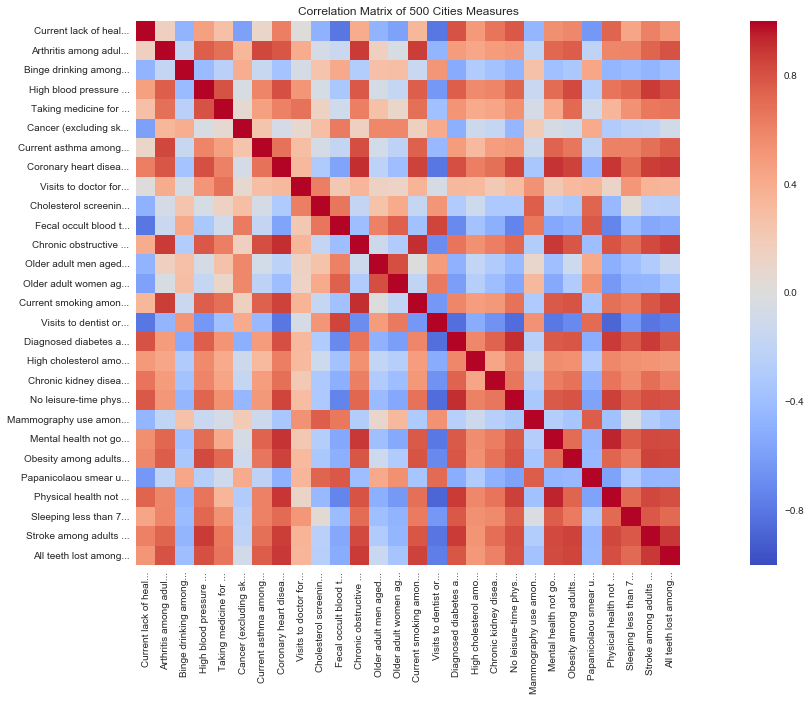

In [9]:
f, ax = plt.subplots(figsize = (25, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, annot = False, vmax = 1, square = True, cmap = 'coolwarm')
plt.title("Correlation Matrix of 500 Cities Measures")
plt.show()

In [10]:
label_list[14]

'Current smoking amon...'

In [11]:
# Keep variables with +- 0.50 positive or negative correlation
correlated_vars = corrmat[corrmat[label_list[14]] >= 0.50]
correlated_vars.append(corrmat[corrmat[label_list[14]] <= -0.50])

# Gather row names
threshold_vars = list(correlated_vars.index)

#threshold_vars

In [12]:
#corrmat["Current smoking among adults aged >=18 Years"]

## PairPlot Results

Below, we see pair plots of all variables which had greater than 0.50 correlation or a less than -0.50 correlation with smoking rates among adults. 

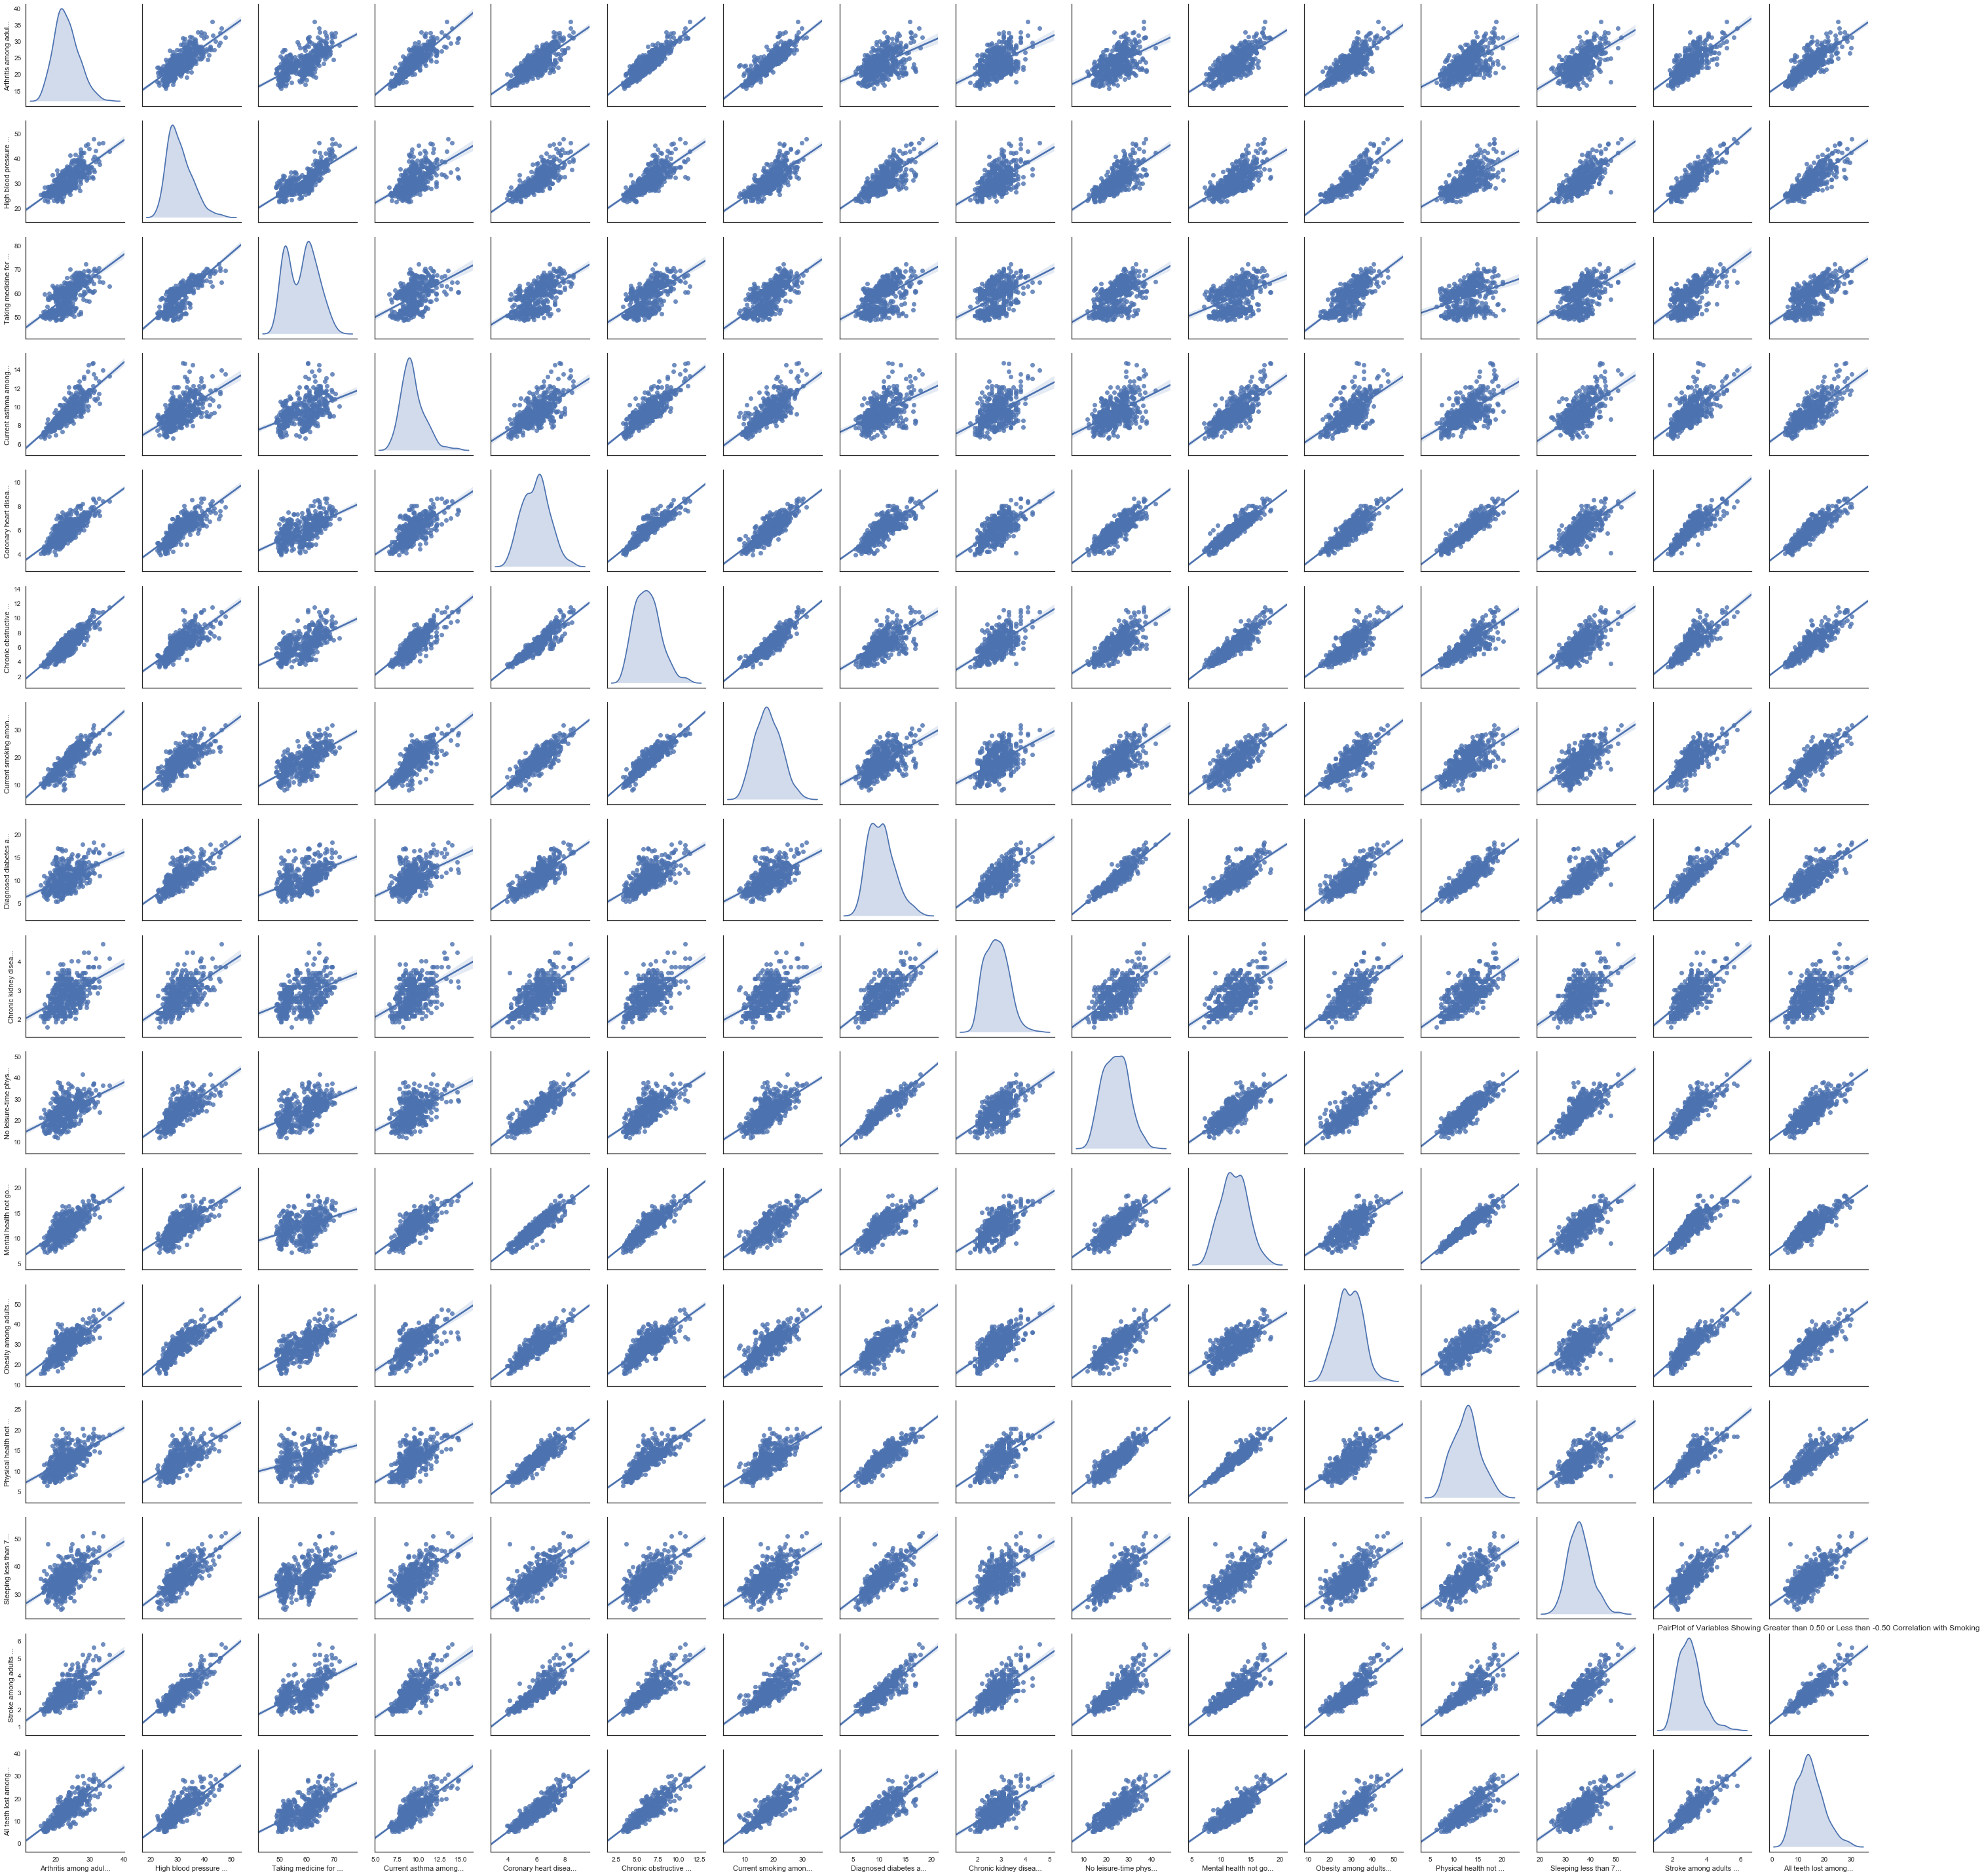

In [13]:
# PairPlot
g = sns.pairplot(healthdata, kind = "reg", diag_kind = "kde", diag_kws = dict(shade = True), palette="husl", size = 2.5,
                 vars = threshold_vars)
plt.title("PairPlot of Variables Showing Greater than 0.50 or Less than -0.50 Correlation with Smoking")
plt.show()

There is a high association (>50%) between rates of smoking in a City and rates of arthritis, high blood pressure, coronary heart disease, Chronic obstructive pulmonary disease, poor mental health, obesity, stroke, and teeth lost among adults. At the end of the experiment, it will be interesting to investigate whether there is any corresponding drop in these diseases when rates of smoking decrease. 

## Exploration of rates of adult smoking
In 2014, 18.2% of age-adjusted United States citizens included in this dataset are current tobacco users, with the inner 50% of cities measured having between 14.9% and 21.3% of adults being current tobacco users. 

In [14]:
healthdata[label_list[14]].describe()

count    474.000000
mean      18.175738
std        4.418874
min        7.900000
25%       14.950000
50%       17.950000
75%       21.300000
max       31.400000
Name: Current smoking amon..., dtype: float64

This data suggests that there may be an association with smoking and a variety of other factors, including rates of Arthritis, high blood pressure, rates of people on high blood pressure medication, asthma, heart disease', kidney disease, mental health not good for >14 days, lack of leisure time, obesity, stroke rate, number of teeth lost, lack of sleep under 7 hours per night, and health not good for >14 days. 

In our experiment, we shall measure the changes in smoking rates and also see if there are any corresponding differences in other associated variables. 

One bias present in this dataset is that it only includes city populations. It does not capture the response from rural populations. Let's explore the cities included in the data set. 

In [15]:
citypops = dat[(dat.GeographicLevel == "City") & (dat.Measure == "Current smoking among adults aged >=18 Years")]["PopulationCount"]

## City populations included in the dataset

The median population count in the dataset has a population of 106,106, with populations ranging in size from 42,417 to 8,175,133. The mean population count is 206,041. This suggests that cities are present with a very high population count relative to the distribution of populations in other cities.

In [16]:
citypops.describe()

count    5.000000e+02
mean     2.060416e+05
std      4.574810e+05
min      4.241700e+04
25%      8.159000e+04
50%      1.061060e+05
75%      1.811278e+05
max      8.175133e+06
Name: PopulationCount, dtype: float64

The bottom 50% of cities have less than 106,106 residents. The histogram below shows the distribution of city populations. 

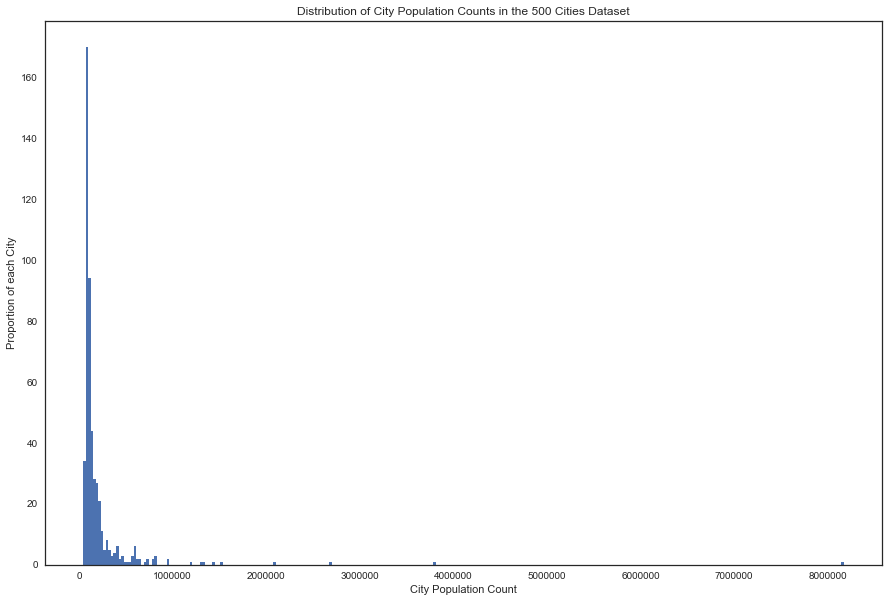

In [26]:
plt.figure(figsize = (15,10))
plt.hist(citypops, bins = 300)
plt.title("Distribution of City Population Counts in the 500 Cities Dataset")
plt.xlabel("City Population Count")
plt.ylabel("Proportion of each City")
plt.show()